# Analysis of effect of simplistic plate wings

Purpose of experiment is to see if any of the effects of the wings can be replicated using dummy wings

Need to load:

    - Ellipsoid
    - Bernard body_wings
    - Bernard body
    - Dummy wings x 10 

    

In [15]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [16]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [17]:
pol_list = ['H', 'V']
results_list = [
    'Bernard_body', 
    'Bernard_body_wing', 
    'Ellipsoid', 
    'Dummy_wing',
    'Dummy_wing_thicker',
    'Moth cuboid wings mid',
    'Moth cuboid wings up',
    'Moth cuboid wings down',
    ]

In [18]:
data_dict = {x : {y: None for y in results_list} for x in pol_list}

In [19]:
for pol in pol_list:
    BODY_PATH = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_p0_s0_df.csv'
    data_dict[pol]['Bernard_body'] = pd.read_csv(BODY_PATH)

    BODY_WING_PATH = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_wing_p0_s0_df.csv'
    data_dict[pol]['Bernard_body_wing'] = pd.read_csv(BODY_WING_PATH)

    ELLIPSOID_BODY_PATH = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/csv/Ellipsoid_parameterised_560_{pol}_1000_p0_s0__df.csv'
    data_dict[pol]['Ellipsoid'] = pd.read_csv(ELLIPSOID_BODY_PATH)

In [20]:
path_list = [
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/replace_wing/Bernard_rw_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/replace_wing/Bernard_rw_thicker_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/replace_wing/Bernard_rw_thicker_rotated_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/replace_wing/Bernard_rw_up_thicker_rotated_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/replace_wing/Bernard_rw_down_thicker_rotated_',

]

output_path_list = [
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/replace_wing/Bernard_rw_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/replace_wing/Bernard_rw_thicker_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/replace_wing/Bernard_rw_thicker_rotated_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/replace_wing/Bernard_rw_up_thicker_rotated_',
    BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/replace_wing/Bernard_rw_down_thicker_rotated_',
]

label_list = [
    'Dummy_wing',
    'Dummy_wing_thicker',
    'Moth cuboid wings mid',
    'Moth cuboid wings up',
    'Moth cuboid wings down',
]

for pol in pol_list:
    for base_path, base_output_path, label in zip(path_list, output_path_list, label_list):
            path = base_path + f'{pol}.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = base_output_path + f'{pol}.csv'
            df.to_csv(output_path)
            data_dict[pol][label] = df

In [21]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase

def get_vertical_returned_phase(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    phase = np.angle(vertical_field) * 180 / np.pi
    return phase

def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power

def get_vertical_returned_power(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    power = np.abs(vertical_field)**2
    return power

def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)**2
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio

In [22]:
vars_list = ['HH_power', 'VV_power', 'Zdr', 'LDR', 'HH_phase', 'VV_phase', 'PhiDP']

In [23]:
results_dict = {y : {z : None for z in vars_list} for y in results_list}


for morpho in results_list: 
    print(morpho)
    results_dict[morpho]['HH_power'] = get_horizontal_returned_power(data_dict['H'][morpho])
    results_dict[morpho]['VV_power'] = get_vertical_returned_power(data_dict['V'][morpho])
    results_dict[morpho]['HH_phase'] = get_horizontal_returned_phase(data_dict['H'][morpho])
    results_dict[morpho]['VV_phase'] = get_vertical_returned_phase(data_dict['V'][morpho])
    results_dict[morpho]['LDR'] = get_linear_depol_ratio(data_dict['H'][morpho])

    dp = DualPol(data_dict['H'][morpho], data_dict['V'][morpho], read_from_df=True)
    dp._calculate_differential_reflectivity()
    dp._calculate_differential_phase()

    results_dict[morpho]['Zdr'] = dp.differential_reflectivity
    results_dict[morpho]['PhiDP'] = dp.differential_phase

Bernard_body
Bernard_body_wing
Ellipsoid
Dummy_wing
Dummy_wing_thicker
Moth cuboid wings mid
Moth cuboid wings up
Moth cuboid wings down


## Plotting

In [24]:
dummy_wing_variation_list = [
    'Bernard_body', 
    'Bernard_body_wing', 
    'Ellipsoid', 
    'Dummy_wing',
    'Dummy_wing_thicker',
    'Moth cuboid wings mid',
    ] 

wing_position_list = [
    'Moth cuboid wings mid',
    'Moth cuboid wings up',
    'Moth cuboid wings down',
]

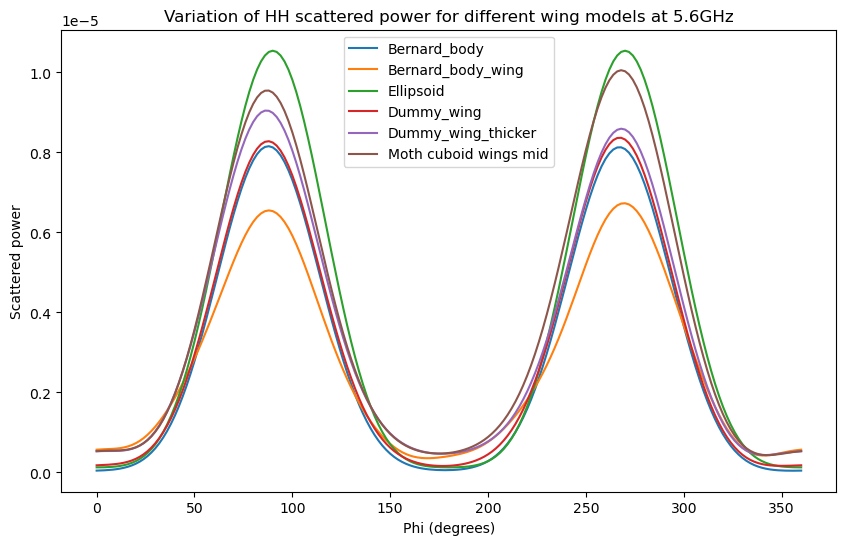

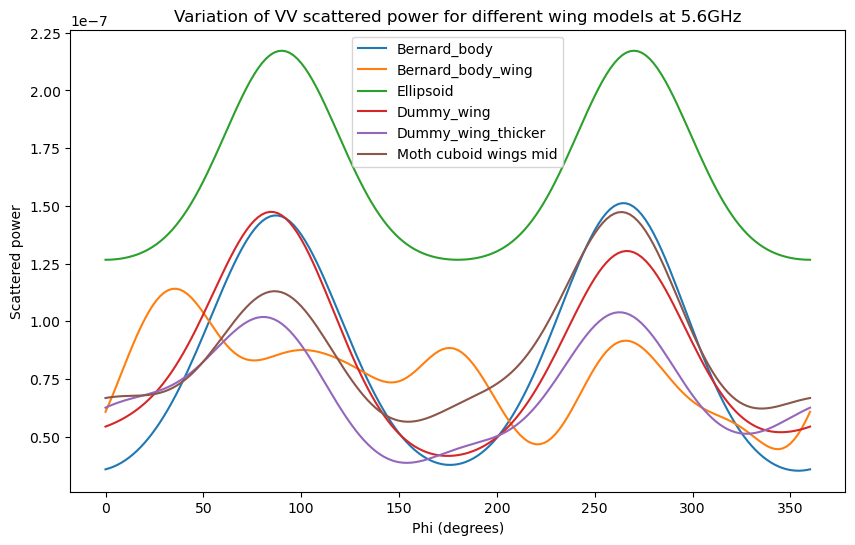

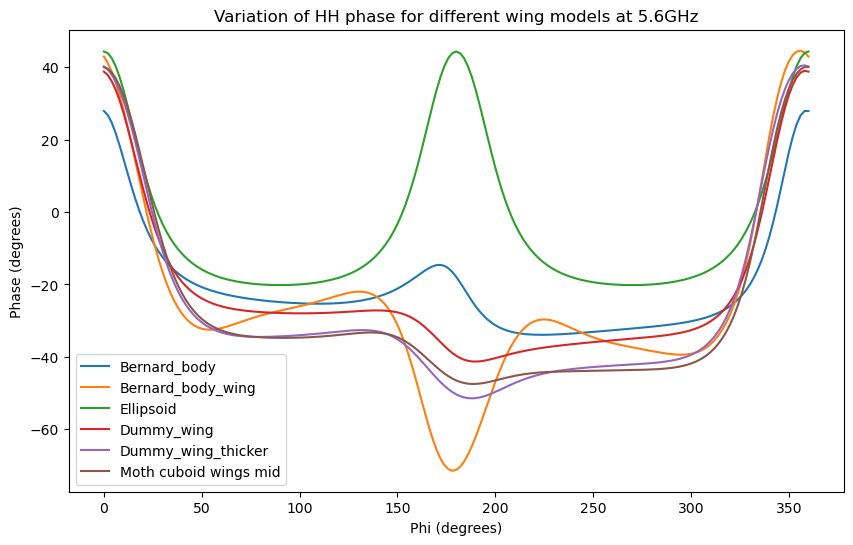

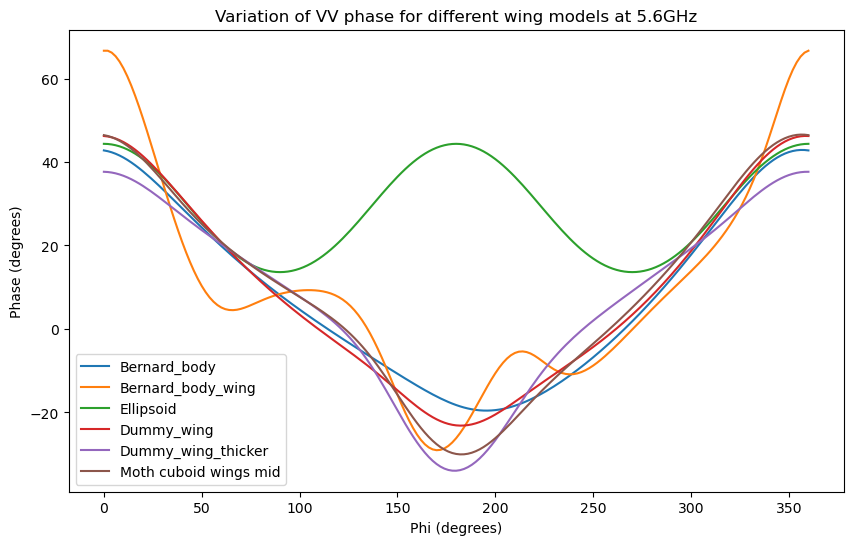

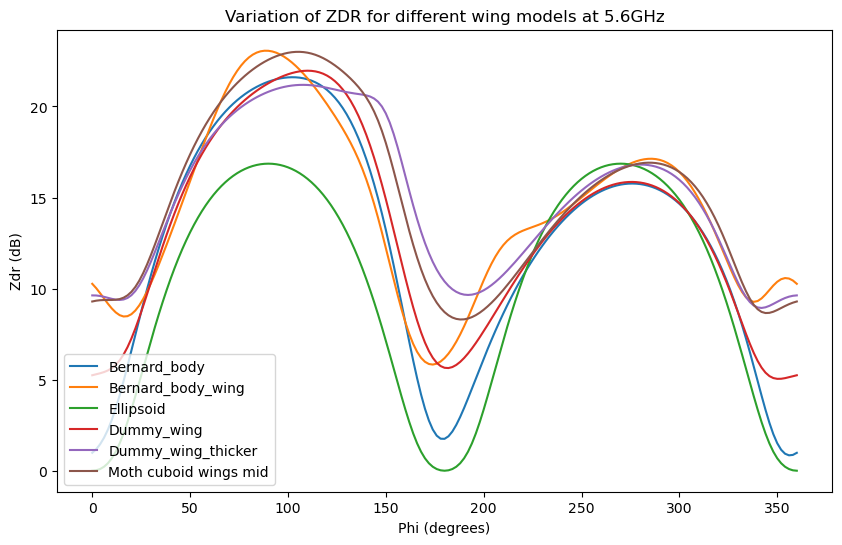

Text(0.5, 1.0, 'Variation of PhiDP for different body models at 5.6GHz')

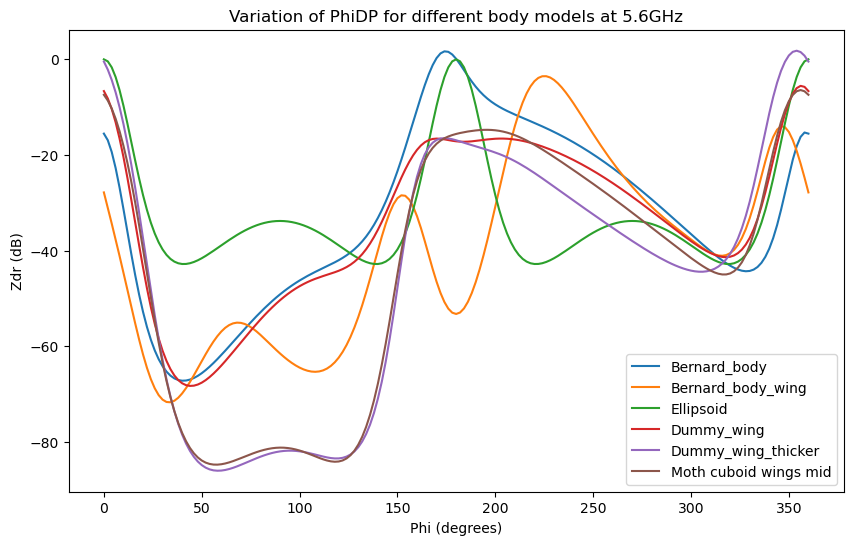

In [25]:
modelling_list = dummy_wing_variation_list

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of HH scattered power for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of VV scattered power for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of HH phase for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of VV phase for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['Zdr'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of ZDR for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['PhiDP'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of PhiDP for different body models at 5.6GHz')

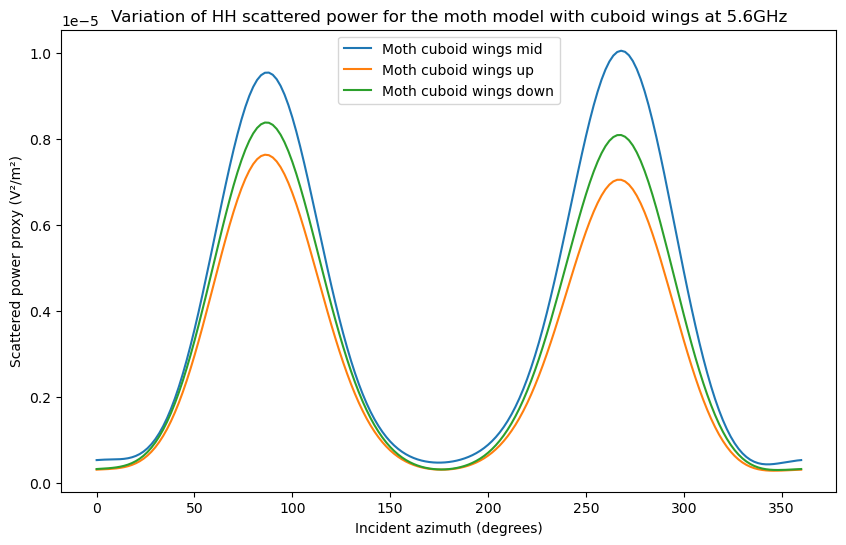

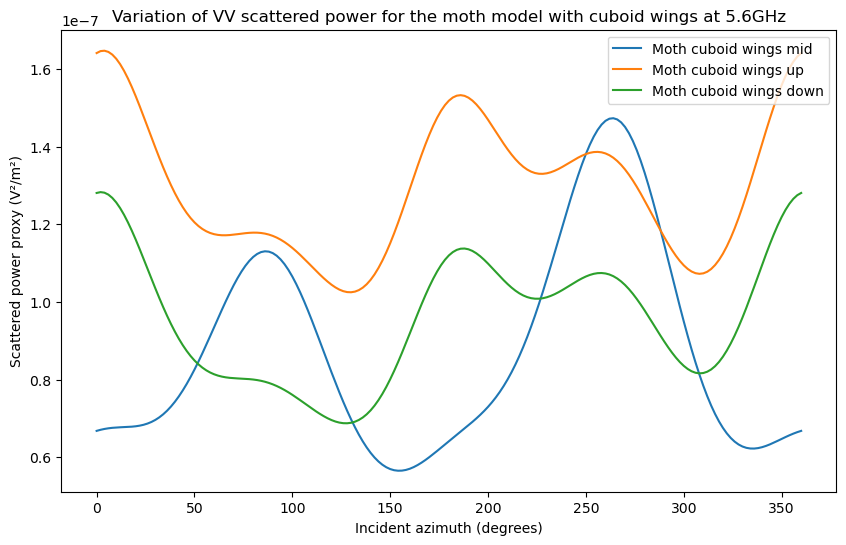

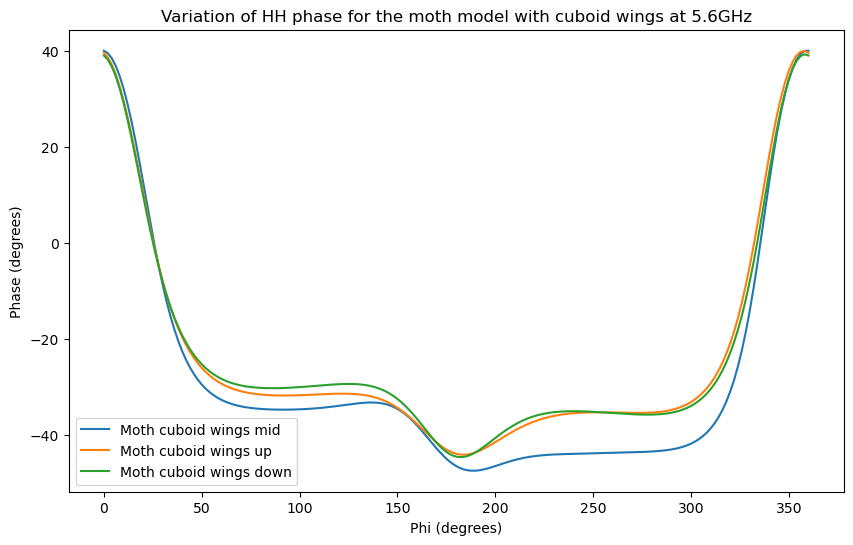

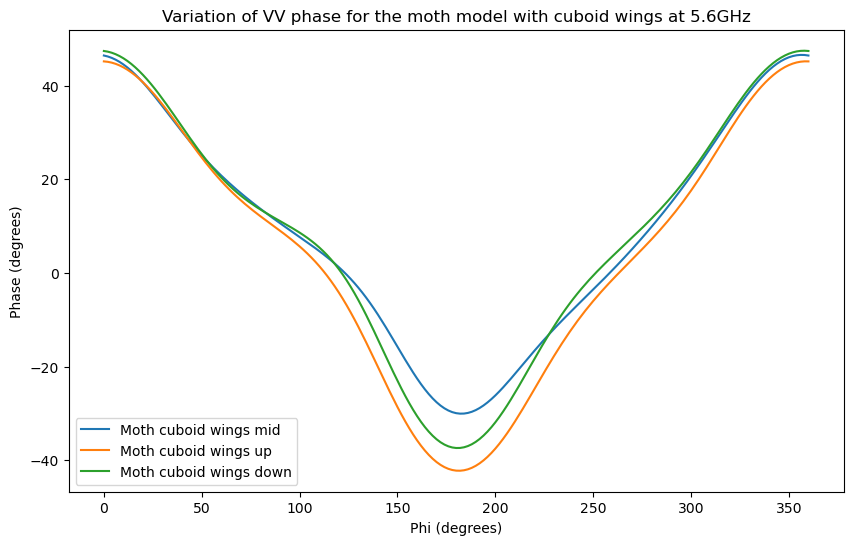

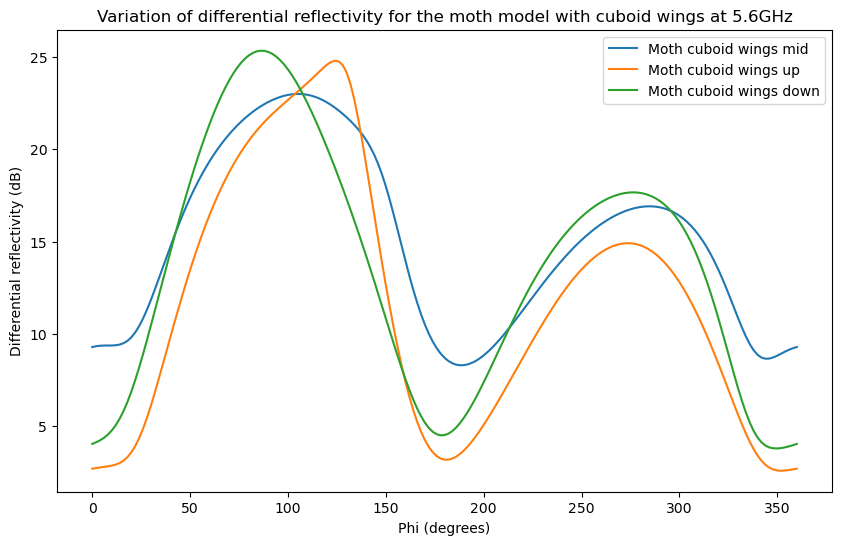

Text(0.5, 1.0, 'Variation of differential phase for the moth model with cuboid wings at 5.6GHz')

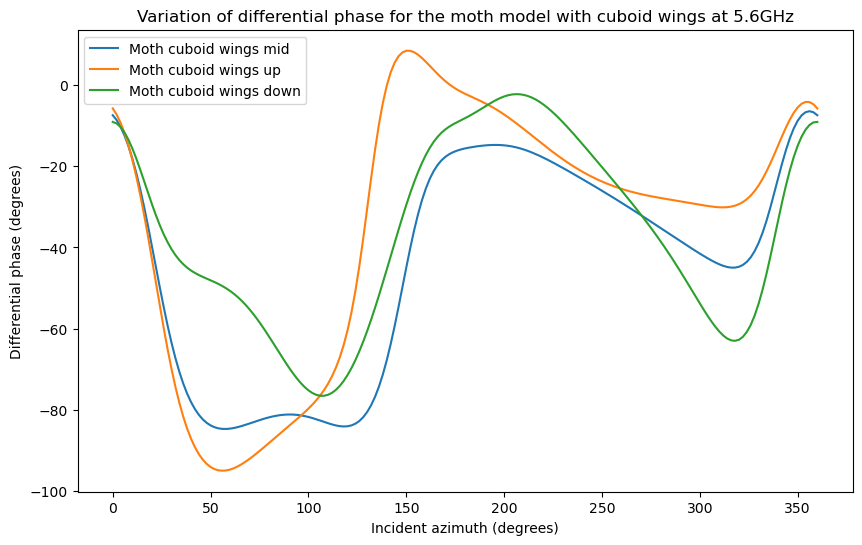

In [28]:
title_centre = 'for the moth model with cuboid wings'

modelling_list = wing_position_list

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Scattered power proxy (V²/m²)')
plt.title(f'Variation of HH scattered power {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Scattered power proxy (V²/m²)')
plt.title(f'Variation of VV scattered power {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of HH phase {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of VV phase {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['Zdr'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential reflectivity (dB)')
plt.title(f'Variation of differential reflectivity {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['PhiDP'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of differential phase {title_centre} at 5.6GHz')

KeyError: 'Dummy_wing_thicker_rotated'

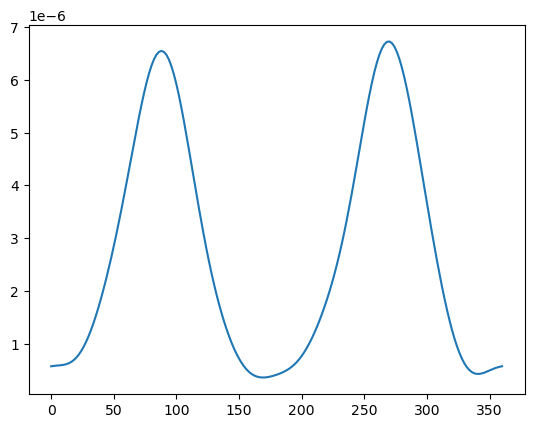

In [27]:
modelling_list = ['Bernard_body_wing', 'Dummy_wing_thicker_rotated', 'Dummy_wing_thicker_rotated_up', 'Dummy_wing_thicker_rotated_down']

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of HH scattered power for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of VV scattered power for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of HH phase for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of VV phase for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['Zdr'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of ZDR for different wing models at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['PhiDP'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of PhiDP for different body models at 5.6GHz')